In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv') 
data2024b_values = data2024b[['V1', 'V2']].values

# Function to compute the GAP statistic
def gap_statistic(data, k_range, n_refs=10):
    # Calculate the log of within-cluster dispersion for observed data
    kmeans_results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        dispersion = kmeans.inertia_  # Sum of squared distances to nearest cluster center
        kmeans_results.append(dispersion)

    # Create reference data
    refs = np.random.rand(n_refs, data.shape[0], data.shape[1])
    ref_dispersions = np.zeros((n_refs, len(k_range)))

    for i in range(n_refs):
        for j, k in enumerate(k_range):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(refs[i])
            ref_dispersions[i, j] = kmeans.inertia_

    # Calculate the GAP statistic
    gap = np.mean(np.log(ref_dispersions), axis=0) - np.log(kmeans_results)
    return gap, kmeans_results

# Normalize the datasets
scaler = StandardScaler()
data2024b_std = scaler.fit_transform(data2024b_values)

# Define range of K values
k_range = range(1, 11)

# Compute GAP statistics for artificial dataset
gap_artificial, kmeans_results_artificial = gap_statistic(data2024b_std, k_range)

# Identify optimal number of clusters based on the GAP statistic
optimal_k_artificial = np.argmax(gap_artificial) + 1

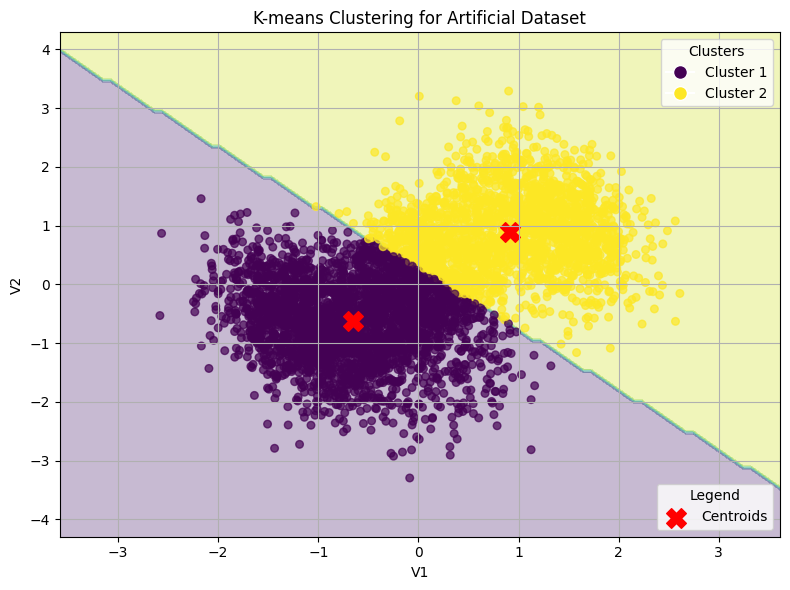

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to plot K-means clusters
def plot_kmeans_clusters(data, kmeans, title, feature_names=None, k=0, i=0):

    # Create a mesh grid for the feature space
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict cluster labels for each point in the mesh grid
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot the data points, colored by their cluster
    scatter = plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=30, alpha=0.7)

    # Plot the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')

    # Create legend handles for each cluster color
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(k)]
    leg = plt.legend(handles, [f'Cluster {i+1}' for i in range(k)], title="Clusters")
    plt.legend(title="Legend", loc=4)
    plt.gca().add_artist(leg)

    plt.title(title)
    plt.xlabel(feature_names[0] if feature_names else 'Feature 1')
    plt.ylabel(feature_names[1] if feature_names else 'Feature 2')
    plt.grid(True)

# Create a figure for the plots
plt.figure(figsize=(8, 6))

# Fit K-means
kmeans_artificial = KMeans(n_clusters=optimal_k_artificial, random_state=42).fit(data2024b_std)

# Plot Artificial dataset clustering (using V1 and V2)
plot_kmeans_clusters(data2024b_std, kmeans_artificial, "K-means Clustering for Artificial Dataset", feature_names=["V1", "V2"], k=2, i=2)

plt.tight_layout()
plt.show()
